### LOAD&nbsp;DATA

In [1]:
# Importing all neccessary libraries
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plot
import seaborn as snsg 
%matplotlib inline
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import networkx as nx

In [2]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

In [3]:
#reading of all movielens dataset(small data)
df_rating = pd.read_csv('ratings.csv')
df_tags = pd.read_csv('tags.csv')
df_movie = pd.read_csv('movies.csv')
df_links = pd.read_csv('links.csv')

### EXPLORATORY ANALYSIS

In [4]:
#Extracting release year from the title
df_movie['release_year'] = df_movie.title.str.extract("\((\d{4})\)", expand=True).astype(str)

In [5]:
#converting release year to a Datetime Object
df_movie['release_year'] = pd.to_datetime(df_movie.release_year, format='%Y')
df_movie['release_year'] = df_movie.release_year.dt.year
df_movie['title'] = df_movie.title.str[:-7]

In [6]:
#Printing out the unique release year in the movie dataset
temp = df_movie.release_year.unique()
temp.sort()
print(temp)

[1902. 1903. 1908. 1915. 1916. 1917. 1919. 1920. 1921. 1922. 1923. 1924.
 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936.
 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948.
 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960.
 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972.
 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984.
 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996.
 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008.
 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.   nan]


In [7]:
#Printing out the genres in the movie dataset
temp = df_movie.genres.unique()
temp.sort()
print(temp)

['(no genres listed)' 'Action' 'Action|Adventure'
 'Action|Adventure|Animation' 'Action|Adventure|Animation|Children'
 'Action|Adventure|Animation|Children|Comedy'
 'Action|Adventure|Animation|Children|Comedy|Fantasy'
 'Action|Adventure|Animation|Children|Comedy|IMAX'
 'Action|Adventure|Animation|Children|Comedy|Romance'
 'Action|Adventure|Animation|Children|Comedy|Sci-Fi'
 'Action|Adventure|Animation|Children|Comedy|Sci-Fi|IMAX'
 'Action|Adventure|Animation|Children|Comedy|Western'
 'Action|Adventure|Animation|Children|Fantasy'
 'Action|Adventure|Animation|Children|Fantasy|Sci-Fi'
 'Action|Adventure|Animation|Children|Sci-Fi'
 'Action|Adventure|Animation|Comedy'
 'Action|Adventure|Animation|Comedy|Crime|Mystery'
 'Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi'
 'Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi'
 'Action|Adventure|Animation|Comedy|Sci-Fi'
 'Action|Adventure|Animation|Comedy|Thriller'
 'Action|Adventure|Animation|Crime|Fantasy'
 'Action|Adventure|Animation|Dr

In [8]:
# Printing unique genres. This is also given in the dataset description file
genres_unique = pd.DataFrame(df_movie.genres.str.split('|').tolist()).stack().unique()
print('Unique genres', genres_unique)
genres_unique = pd.DataFrame(genres_unique, columns=['genres'])

Unique genres ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


In [9]:
df_movie.head()

,movieId,title,genres,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0


In [10]:
df_movies = df_rating.merge(df_movie, on='movieId')
df_movies.head()

,userId,movieId,rating,timestamp,title,genres,release_year
0,1,1,4.0,964982703,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,5,1,4.0,847434962,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,7,1,4.5,1106635946,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
3,15,1,2.5,1510577970,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
4,17,1,4.5,1305696483,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0


In [11]:
df_movies.drop('timestamp', inplace=True, axis=1)


In [12]:
df_movies.head()

,userId,movieId,rating,title,genres,release_year
0,1,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,5,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,7,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
3,15,1,2.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
4,17,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0


In [13]:
df_movies.isnull().sum() 

userId           0
movieId          0
rating           0
title            0
genres           0
release_year    18
dtype: int64

In [14]:
df_movies.dropna(inplace=True) #just drop the missing data review three movies which dont have overview

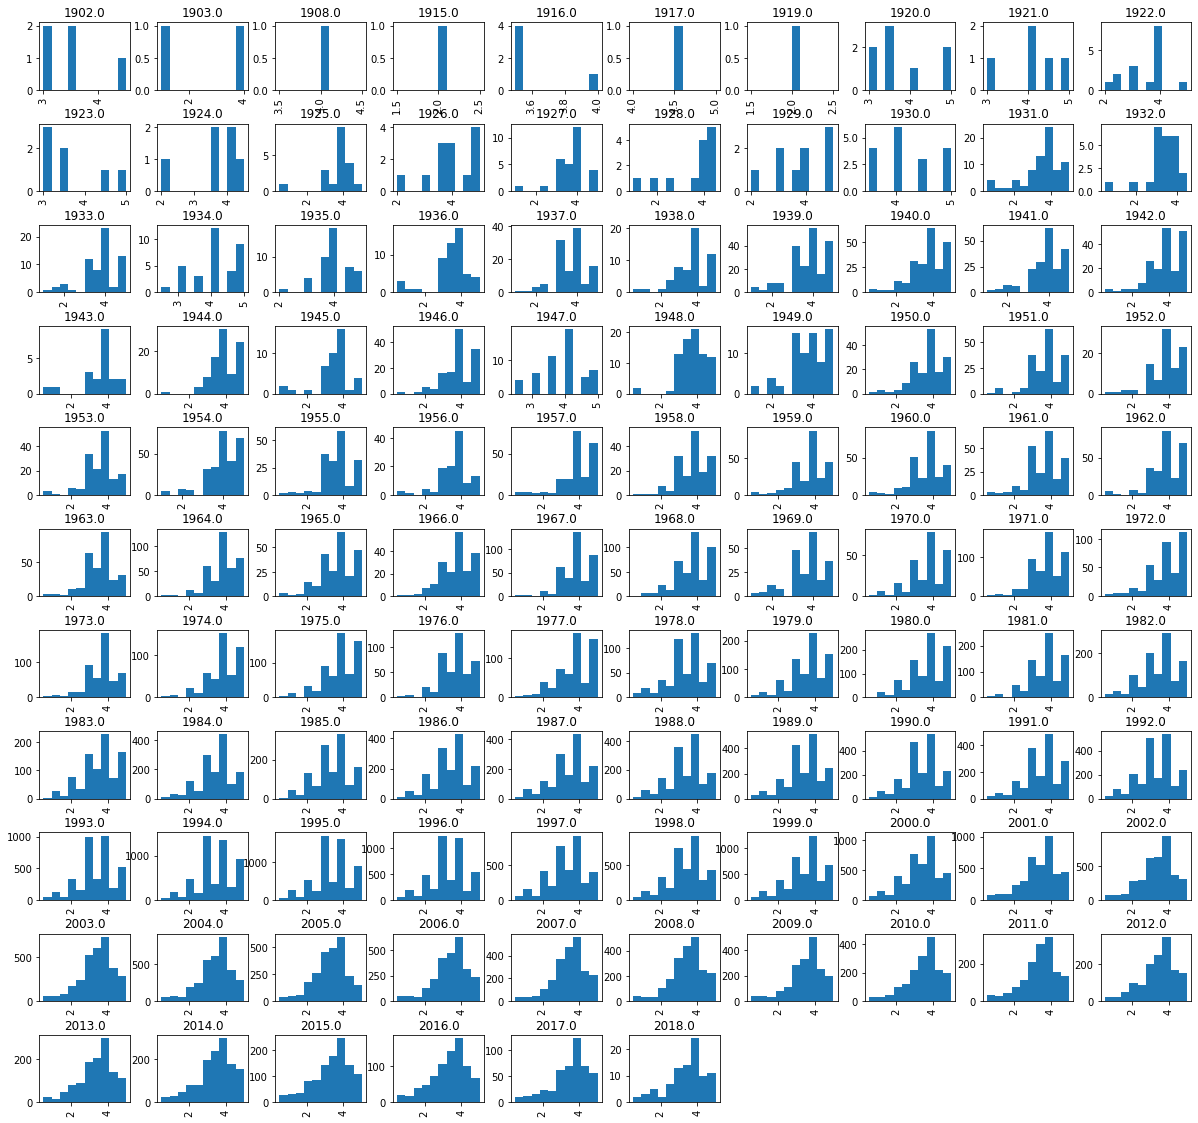

In [15]:
df_movies['rating'].hist(by=df_movies['release_year'], figsize=(20, 20));

In [16]:
#define a function that counts the number of times each genre appear:
def count_word(df_movies, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df_movies[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [17]:
#here we  make census of the genres:
genre_labels = set()
for s in df_movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [18]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(df_movies, 'genres', genre_labels)
keyword_occurences

[['Drama', 41926],
 ['Comedy', 39053],
 ['Action', 30631],
 ['Thriller', 26447],
 ['Adventure', 24161],
 ['Romance', 18124],
 ['Sci-Fi', 17237],
 ['Crime', 16681],
 ['Fantasy', 11834],
 ['Children', 9208],
 ['Mystery', 7674],
 ['Horror', 7291],
 ['Animation', 6988],
 ['War', 4859],
 ['IMAX', 4145],
 ['Musical', 4138],
 ['Western', 1930],
 ['Documentary', 1219],
 ['Film-Noir', 870],
 ['(no genres listed)', 37]]

### The top 25 Movies by Viewership Rating

In [19]:
movie_rating = df_movies.groupby(['movieId'], as_index=False)
average_movie_rating = movie_rating.agg({'rating':'mean'})
top_25_movies = average_movie_rating.sort_values('rating', ascending=False).head(25)


In [20]:
top_25_movies

,movieId,rating
7617,87834,5.0
8917,136359,5.0
2232,2969,5.0
8854,134004,5.0
4759,7096,5.0
8858,134095,5.0
8859,134109,5.0
8877,134796,5.0
8879,134847,5.0
8914,136341,5.0


In [21]:
top_25_movies_viewership_data = pd.merge(top_25_movies, df_movies, left_on=['movieId'], right_on=['movieId'])
top_25_movies_viewership_data

,movieId,rating_x,userId,rating_y,title,genres,release_year
0,87834,5.0,89,5.0,My Life as McDull (Mak dau goo si),Animation|Comedy|Drama,2001.0
1,136359,5.0,89,5.0,Scooby-Doo Goes Hollywood,Animation|Children|Comedy,1979.0
2,2969,5.0,113,5.0,"Man and a Woman, A (Un homme et une femme)",Drama|Romance,1966.0
3,134004,5.0,89,5.0,What Love Is,Comedy|Romance,2007.0
4,7096,5.0,110,5.0,Rivers and Tides,Documentary,2001.0
5,134095,5.0,105,5.0,My Love,Animation|Drama,2006.0
6,134109,5.0,105,5.0,Radio Day,Comedy,2008.0
7,134796,5.0,318,5.0,Bitter Lake,Documentary,2015.0
8,134847,5.0,89,5.0,Ghost Graduation,Comedy,2012.0
9,136341,5.0,89,5.0,Scooby-Doo! and the Samurai Sword,Animation|Children|Comedy,2009.0


### Extract all movies with a rating of 5.0

In [22]:
df_5 = df_movies[df_movies['rating']==5.0]
df_5.head()

,userId,movieId,rating,title,genres,release_year
9,31,1,5.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
12,40,1,5.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
13,43,1,5.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
16,46,1,5.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
19,57,1,5.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0


In [23]:

df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13206 entries, 9 to 100815
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        13206 non-null  int64  
 1   movieId       13206 non-null  int64  
 2   rating        13206 non-null  float64
 3   title         13206 non-null  object 
 4   genres        13206 non-null  object 
 5   release_year  13206 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 722.2+ KB


In [24]:
input_2 = 'Extract all movies with a rating of 4.0'

In [25]:
df_4 = df_movies[df_movies['rating']==4.0]
df_4.head()

,userId,movieId,rating,title,genres,release_year
0,1,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,5,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
6,19,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
15,45,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
21,64,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0


In [26]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26815 entries, 0 to 100825
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        26815 non-null  int64  
 1   movieId       26815 non-null  int64  
 2   rating        26815 non-null  float64
 3   title         26815 non-null  object 
 4   genres        26815 non-null  object 
 5   release_year  26815 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.4+ MB


In [27]:
input_3 = 'Extract all movies with a rating of 1.0'

In [28]:

df_1 = df_movies[df_movies['rating']==1.0]
df_1.head()


,userId,movieId,rating,title,genres,release_year
235,217,3,1.0,Grumpier Old Men,Comedy|Romance,1995.0
242,294,3,1.0,Grumpier Old Men,Comedy|Romance,1995.0
260,552,3,1.0,Grumpier Old Men,Comedy|Romance,1995.0
315,308,6,1.0,Heat,Action|Crime|Thriller,1995.0
475,314,47,1.0,Seven (a.k.a. Se7en),Mystery|Thriller,1995.0


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2810 entries, 235 to 100684
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        2810 non-null   int64  
 1   movieId       2810 non-null   int64  
 2   rating        2810 non-null   float64
 3   title         2810 non-null   object 
 4   genres        2810 non-null   object 
 5   release_year  2810 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 153.7+ KB


In [30]:
input_4 = 'Extract all comedy movies with a rating of 5.0'

In [31]:
df_5comedy = df_5[df_5['genres']=='Comedy']
df_5comedy.head()

,userId,movieId,rating,title,genres,release_year
1212,1,216,5.0,Billy Madison,Comedy,1995.0
1217,45,216,5.0,Billy Madison,Comedy,1995.0
1222,136,216,5.0,Billy Madison,Comedy,1995.0
1227,226,216,5.0,Billy Madison,Comedy,1995.0
1228,240,216,5.0,Billy Madison,Comedy,1995.0


### Cosine Similarities

In [32]:
from re import search
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
cmcomedyrated5 = CountVectorizer().fit_transform(df_5comedy['title'])

In [33]:
cmcomedyrated5

<656x487 sparse matrix of type '<class 'numpy.int64'>'
	with 1864 stored elements in Compressed Sparse Row format>

In [34]:
cscomedyrated5 = cosine_similarity(cmcomedyrated5)

In [35]:
#Cosine similiarity matrix for comedy movies with a rating of 5.0
cscomedyrated5

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Visualization&nbsp;of&nbsp;relationship&nbsp;seen&nbsp;between&nbsp;Film-Noir&nbsp;Movies

In [37]:
#Extract all Film-Noir movies in the dataset
df_filmnoir = df_movies[df_movies['genres']=='Film-Noir']
df_filmnoir.head()

,userId,movieId,rating,title,genres,release_year
96088,290,2066,4.0,Out of the Past,Film-Noir,1947.0
96089,474,2066,4.0,Out of the Past,Film-Noir,1947.0
96090,590,2066,3.5,Out of the Past,Film-Noir,1947.0
96091,603,2066,5.0,Out of the Past,Film-Noir,1947.0
97696,387,4426,3.0,Kiss Me Deadly,Film-Noir,1955.0


In [38]:
df_filmnoir

,userId,movieId,rating,title,genres,release_year
96088,290,2066,4.0,Out of the Past,Film-Noir,1947.0
96089,474,2066,4.0,Out of the Past,Film-Noir,1947.0
96090,590,2066,3.5,Out of the Past,Film-Noir,1947.0
96091,603,2066,5.0,Out of the Past,Film-Noir,1947.0
97696,387,4426,3.0,Kiss Me Deadly,Film-Noir,1955.0
97697,603,4426,5.0,Kiss Me Deadly,Film-Noir,1955.0
99476,477,7335,4.0,Pickup on South Street,Film-Noir,1953.0


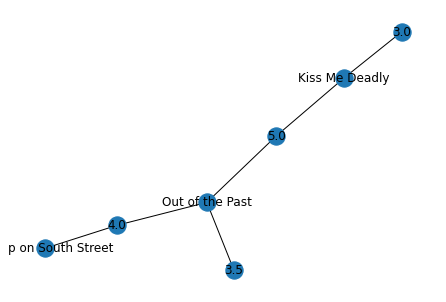

In [39]:
#A network graph showing all film noir movies had a minimum of 3.5 rating in the entire dataset.
G = nx.Graph()
G = nx.from_pandas_edgelist(df_filmnoir, 'title', 'rating')
nx.draw(G, with_labels=True)
plt.show()

### User to User Similarity between users with ID 18,305,448,249,119

In [40]:
df_18 = df_movies[df_movies['userId']==18]
df_18.head()

,userId,movieId,rating,title,genres,release_year
5,18,1,3.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
270,18,6,4.0,Heat,Action|Crime|Thriller,1995.0
378,18,47,4.5,Seven (a.k.a. Se7en),Mystery|Thriller,1995.0
579,18,50,5.0,"Usual Suspects, The",Crime|Mystery|Thriller,1995.0
777,18,70,3.5,From Dusk Till Dawn,Action|Comedy|Horror|Thriller,1996.0


In [41]:
#,305,448,249,119
df_305 = df_movies[df_movies['userId']==305]
df_305.head()

,userId,movieId,rating,title,genres,release_year
314,305,6,3.5,Heat,Action|Crime|Thriller,1995.0
472,305,47,4.0,Seven (a.k.a. Se7en),Mystery|Thriller,1995.0
673,305,50,5.0,"Usual Suspects, The",Crime|Mystery|Thriller,1995.0
798,305,70,5.0,From Dusk Till Dawn,Action|Comedy|Horror|Thriller,1996.0
1179,305,163,5.0,Desperado,Action|Romance|Western,1995.0


In [42]:
df_448 = df_movies[df_movies['userId']==448]
df_448.head()

,userId,movieId,rating,title,genres,release_year
154,448,1,5.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
252,448,3,3.0,Grumpier Old Men,Comedy|Romance,1995.0
526,448,47,4.0,Seven (a.k.a. Se7en),Mystery|Thriller,1995.0
729,448,50,4.0,"Usual Suspects, The",Crime|Mystery|Thriller,1995.0
843,448,101,3.5,Bottle Rocket,Adventure|Comedy|Crime|Romance,1996.0


In [43]:
df_249 = df_movies[df_movies['userId']==249]
df_249.head()

,userId,movieId,rating,title,genres,release_year
89,249,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
457,249,47,5.0,Seven (a.k.a. Se7en),Mystery|Thriller,1995.0
652,249,50,4.0,"Usual Suspects, The",Crime|Mystery|Thriller,1995.0
791,249,70,4.0,From Dusk Till Dawn,Action|Comedy|Horror|Thriller,1996.0
834,249,101,3.0,Bottle Rocket,Adventure|Comedy|Crime|Romance,1996.0


In [44]:
df_119 = df_movies[df_movies['userId']==119]
df_119.head()

,userId,movieId,rating,title,genres,release_year
39,119,1,3.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1878,119,296,4.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
2493,119,356,4.0,Forrest Gump,Comedy|Drama|Romance|War,1994.0
6418,119,1092,4.0,Basic Instinct,Crime|Mystery|Thriller,1992.0
8760,119,1270,4.0,Back to the Future,Adventure|Comedy|Sci-Fi,1985.0


In [45]:
#Concatenating of all extracted user id data into a single datframe.
df_new= pd.concat([df_18,df_305,df_448,df_249,df_119])

In [46]:
df_new.head()

,userId,movieId,rating,title,genres,release_year
5,18,1,3.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
270,18,6,4.0,Heat,Action|Crime|Thriller,1995.0
378,18,47,4.5,Seven (a.k.a. Se7en),Mystery|Thriller,1995.0
579,18,50,5.0,"Usual Suspects, The",Crime|Mystery|Thriller,1995.0
777,18,70,3.5,From Dusk Till Dawn,Action|Comedy|Horror|Thriller,1996.0


In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 5 to 89779
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        4302 non-null   int64  
 1   movieId       4302 non-null   int64  
 2   rating        4302 non-null   float64
 3   title         4302 non-null   object 
 4   genres        4302 non-null   object 
 5   release_year  4302 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 235.3+ KB


In [ ]:
df_new.to_csv("data.csv", index=False, header=False)

# 

![Users with id 18, 119, 249, 305 and 448 have major similarities in the genres on movies they rated(Adventure|Animation|Children|Comedy|Fantasy)
](image-20220718-144140.png)

![Picture title](image-20220718-144217.png)

### Movie to Movie Similarities



![Picture title](image-20220718-144723.png)

In [48]:
df_145 = df_movies[df_movies['movieId']==145]
df_145.head()

,userId,movieId,rating,title,genres,release_year
28705,6,145,4.0,Bad Boys,Action|Comedy|Crime|Drama|Thriller,1995.0
28706,18,145,3.5,Bad Boys,Action|Comedy|Crime|Drama|Thriller,1995.0
28707,21,145,3.0,Bad Boys,Action|Comedy|Crime|Drama|Thriller,1995.0
28708,28,145,1.5,Bad Boys,Action|Comedy|Crime|Drama|Thriller,1995.0
28709,34,145,1.0,Bad Boys,Action|Comedy|Crime|Drama|Thriller,1995.0


In [49]:
df_296 = df_movies[df_movies['movieId']==296]
df_296.head()

,userId,movieId,rating,title,genres,release_year
1819,1,296,3.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1820,4,296,1.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1821,5,296,5.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1822,6,296,2.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1823,8,296,4.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0


In [50]:
df_106782 = df_movies[df_movies['movieId']==106782]
df_106782.head()

,userId,movieId,rating,title,genres,release_year
17848,2,106782,5.0,"Wolf of Wall Street, The",Comedy|Crime|Drama,2013.0
17849,10,106782,1.0,"Wolf of Wall Street, The",Comedy|Crime|Drama,2013.0
17850,18,106782,3.0,"Wolf of Wall Street, The",Comedy|Crime|Drama,2013.0
17851,21,106782,3.0,"Wolf of Wall Street, The",Comedy|Crime|Drama,2013.0
17852,47,106782,3.5,"Wolf of Wall Street, The",Comedy|Crime|Drama,2013.0


In [51]:
df_608 = df_movies[df_movies['movieId']==608]
df_608.head()

,userId,movieId,rating,title,genres,release_year
4649,1,608,5.0,Fargo,Comedy|Crime|Drama|Thriller,1996.0
4650,4,608,5.0,Fargo,Comedy|Crime|Drama|Thriller,1996.0
4651,5,608,3.0,Fargo,Comedy|Crime|Drama|Thriller,1996.0
4652,6,608,3.0,Fargo,Comedy|Crime|Drama|Thriller,1996.0
4653,16,608,4.5,Fargo,Comedy|Crime|Drama|Thriller,1996.0


In [52]:
#Concatenating of all extracted user id data into a single datframe.
df_movienew= pd.concat([df_296,df_608,df_145,df_106782])

In [53]:
df_movienew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 1819 to 17901
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        593 non-null    int64  
 1   movieId       593 non-null    int64  
 2   rating        593 non-null    float64
 3   title         593 non-null    object 
 4   genres        593 non-null    object 
 5   release_year  593 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 32.4+ KB


In [54]:
df_movienew.head()

,userId,movieId,rating,title,genres,release_year
1819,1,296,3.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1820,4,296,1.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1821,5,296,5.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1822,6,296,2.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1823,8,296,4.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0


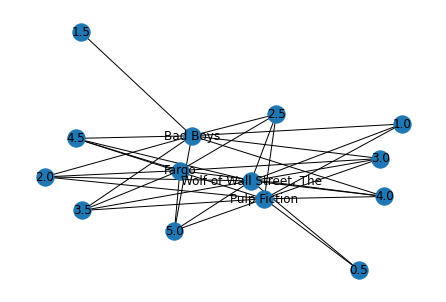

In [55]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df_movienew, 'title', 'rating')
nx.draw(G, with_labels=True)
plt.show()

### 

![Picture title](image-20220718-145120.png)

In [56]:
df_87834 = df_movies[df_movies['movieId']==87834]
df_87834.head()

,userId,movieId,rating,title,genres,release_year
86690,89,87834,5.0,My Life as McDull (Mak dau goo si),Animation|Comedy|Drama,2001.0


In [57]:
df_136359 = df_movies[df_movies['movieId']==136359]
df_136359.head()

,userId,movieId,rating,title,genres,release_year
86888,89,136359,5.0,Scooby-Doo Goes Hollywood,Animation|Children|Comedy,1979.0


In [58]:
df_136341 = df_movies[df_movies['movieId']==136341]
df_136341.head()


,userId,movieId,rating,title,genres,release_year
86885,89,136341,5.0,Scooby-Doo! and the Samurai Sword,Animation|Children|Comedy,2009.0


In [59]:
df_136353 = df_movies[df_movies['movieId']==136353]
df_136353.head()

,userId,movieId,rating,title,genres,release_year
86886,89,136353,5.0,Scooby-Doo! and the Loch Ness Monster,Animation|Children|Comedy,2004.0


In [60]:
df_136355 = df_movies[df_movies['movieId']==136355]
df_136355.head()

,userId,movieId,rating,title,genres,release_year
86887,89,136355,5.0,Big Top Scooby-Doo!,Animation|Children|Comedy,2012.0


In [61]:
#Concatenating of all extracted user id data into a single datframe.
df_movierelationship= pd.concat([df_87834,df_136355,df_136353,df_136341, df_136359])

In [62]:
df_movierelationship.head()

,userId,movieId,rating,title,genres,release_year
86690,89,87834,5.0,My Life as McDull (Mak dau goo si),Animation|Comedy|Drama,2001.0
86887,89,136355,5.0,Big Top Scooby-Doo!,Animation|Children|Comedy,2012.0
86886,89,136353,5.0,Scooby-Doo! and the Loch Ness Monster,Animation|Children|Comedy,2004.0
86885,89,136341,5.0,Scooby-Doo! and the Samurai Sword,Animation|Children|Comedy,2009.0
86888,89,136359,5.0,Scooby-Doo Goes Hollywood,Animation|Children|Comedy,1979.0


In [ ]:
input_1 = 'The movies in the graph below are all ‘Animation|Children|Comedy’ rated five by the user with id 89 over each decade.  '

![Picture title](image-20220718-124315.png)

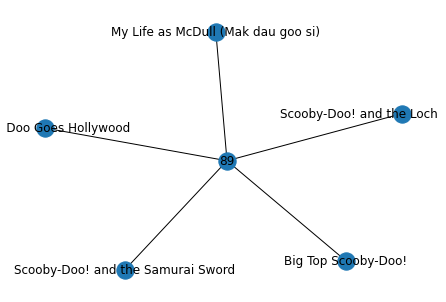

In [63]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df_movierelationship, 'title', 'userId')
nx.draw(G, with_labels=True)
plt.show()

### Relationship between the most rated movies(Movie to Movie similarities)

In [64]:
# Lets see the count of each rating given by users
df_movies.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump                 329
Shawshank Redemption, The    317
Pulp Fiction                 307
Silence of the Lambs, The    279
Matrix, The                  278
Name: rating, dtype: int64

In [66]:
df_356 = df_movies[df_movies['movieId']==356]
df_356.head()

,userId,movieId,rating,title,genres,release_year
2426,1,356,4.0,Forrest Gump,Comedy|Drama|Romance|War,1994.0
2427,6,356,5.0,Forrest Gump,Comedy|Drama|Romance|War,1994.0
2428,7,356,5.0,Forrest Gump,Comedy|Drama|Romance|War,1994.0
2429,8,356,3.0,Forrest Gump,Comedy|Drama|Romance|War,1994.0
2430,10,356,3.5,Forrest Gump,Comedy|Drama|Romance|War,1994.0


In [67]:
df_318 = df_movies[df_movies['movieId']==318]
df_318.head()

,userId,movieId,rating,title,genres,release_year
16296,2,318,3.0,"Shawshank Redemption, The",Crime|Drama,1994.0
16297,5,318,3.0,"Shawshank Redemption, The",Crime|Drama,1994.0
16298,6,318,5.0,"Shawshank Redemption, The",Crime|Drama,1994.0
16299,8,318,5.0,"Shawshank Redemption, The",Crime|Drama,1994.0
16300,11,318,4.0,"Shawshank Redemption, The",Crime|Drama,1994.0


In [68]:
df_296 = df_movies[df_movies['movieId']==296]
df_296.head()

,userId,movieId,rating,title,genres,release_year
1819,1,296,3.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1820,4,296,1.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1821,5,296,5.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1822,6,296,2.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0
1823,8,296,4.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994.0


In [69]:
df_593 = df_movies[df_movies['movieId']==593]
df_593.head()

,userId,movieId,rating,title,genres,release_year
4310,1,593,4.0,"Silence of the Lambs, The",Crime|Horror|Thriller,1991.0
4311,4,593,5.0,"Silence of the Lambs, The",Crime|Horror|Thriller,1991.0
4312,6,593,4.0,"Silence of the Lambs, The",Crime|Horror|Thriller,1991.0
4313,7,593,5.0,"Silence of the Lambs, The",Crime|Horror|Thriller,1991.0
4314,8,593,4.0,"Silence of the Lambs, The",Crime|Horror|Thriller,1991.0


In [70]:
df_2571 = df_movies[df_movies['movieId']==2571]
df_2571.head()

,userId,movieId,rating,title,genres,release_year
12642,1,2571,5.0,"Matrix, The",Action|Sci-Fi|Thriller,1999.0
12643,4,2571,1.0,"Matrix, The",Action|Sci-Fi|Thriller,1999.0
12644,10,2571,0.5,"Matrix, The",Action|Sci-Fi|Thriller,1999.0
12645,13,2571,5.0,"Matrix, The",Action|Sci-Fi|Thriller,1999.0
12646,15,2571,4.0,"Matrix, The",Action|Sci-Fi|Thriller,1999.0


In [71]:
#Concatenating of all extracted movie id data into a single datframe.
df_mostrated= pd.concat([df_2571,df_593,df_296,df_318, df_356])

The top five most rated movies were all produced in the 1990s with three produced in the same year(1994) 

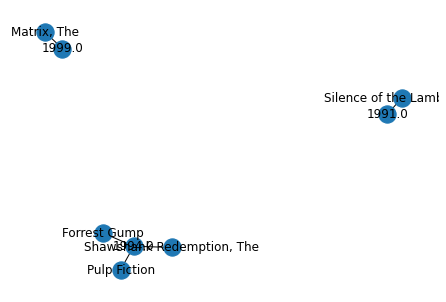

In [76]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df_mostrated, 'title', 'release_year')
nx.draw(G, with_labels=True)
plt.show()

### Relationship between the least rated movies(Movie to Movie similarities)

In [91]:
# Lets see the count of each rating given by users
df_movies.groupby('title')['rating'].count().sort_values(ascending=False).tail(10)

title
Kizumonogatari Part 1: Tekketsu        1
Kizumonogatari II: Passionate Blood    1
King's Ransom                          1
Kite                                   1
Kiss me Kismet                         1
Kiss Me, Stupid                        1
Kiss Me Kate                           1
Kiss Me Goodbye                        1
Kingsglaive: Final Fantasy XV          1
À nous la liberté (Freedom for Us)     1
Name: rating, dtype: int64

In [84]:
df_6578 = df_movies[df_movies['movieId']==6578]
df_6578.head()

,userId,movieId,rating,title,genres,release_year
100597,606,6578,3.5,"Kiss Me, Stupid",Comedy,1964.0


In [85]:
df_6358 = df_movies[df_movies['movieId']==6358]
df_6358.head()

,userId,movieId,rating,title,genres,release_year
66361,20,6358,3.5,Kiss Me Kate,Comedy|Musical|Romance,1953.0


In [86]:
df_6090 = df_movies[df_movies['movieId']==6090]
df_6090.head()


,userId,movieId,rating,title,genres,release_year
99201,474,6090,3.5,Kiss Me Goodbye,Comedy,1982.0


In [87]:

df_161594 = df_movies[df_movies['movieId']==161594]
df_161594.head()

,userId,movieId,rating,title,genres,release_year
92920,184,161594,3.5,Kingsglaive: Final Fantasy XV,Action|Adventure|Animation|Drama|Fantasy|Sci-Fi,2016.0


In [88]:

df_5560 = df_movies[df_movies['movieId']==5560]
df_5560.head()

,userId,movieId,rating,title,genres,release_year
99724,527,5560,1.0,À nous la liberté (Freedom for Us),Comedy|Musical,1931.0


In [92]:

df_136838 = df_movies[df_movies['movieId']==136838]
df_136838.head()

,userId,movieId,rating,title,genres,release_year
99626,509,136838,2.5,Kiss me Kismet,Comedy|Romance,2006.0


In [93]:

df_33148 = df_movies[df_movies['movieId']==33148]
df_33148.head()

,userId,movieId,rating,title,genres,release_year
94426,232,33148,2.5,King's Ransom,Comedy|Crime,2005.0


In [95]:
#Concatenating of all extracted movie id data into a single datframe.
df_leastrated= pd.concat([df_5560,df_161594,df_6090,df_6578, df_6358, df_136838, df_33148])
df_leastrated.head(7)


,userId,movieId,rating,title,genres,release_year
99724,527,5560,1.0,À nous la liberté (Freedom for Us),Comedy|Musical,1931.0
92920,184,161594,3.5,Kingsglaive: Final Fantasy XV,Action|Adventure|Animation|Drama|Fantasy|Sci-Fi,2016.0
99201,474,6090,3.5,Kiss Me Goodbye,Comedy,1982.0
100597,606,6578,3.5,"Kiss Me, Stupid",Comedy,1964.0
66361,20,6358,3.5,Kiss Me Kate,Comedy|Musical|Romance,1953.0
99626,509,136838,2.5,Kiss me Kismet,Comedy|Romance,2006.0
94426,232,33148,2.5,King's Ransom,Comedy|Crime,2005.0


The seven least rated movies were mostly comedy movies with a common phrase 'Kiss'.

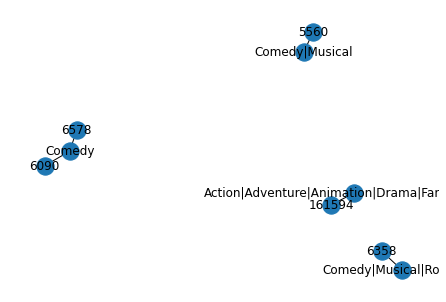

In [97]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df_mostrated, 'movieId', 'genres')
nx.draw(G, with_labels=True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27bcd221-b64d-46f2-83dc-8fb199a7eed4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>